In [5]:
# -*- coding:utf-8 -*-
import pandas as pd
import subprocess
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


# 数据导入
xls_file = pd.ExcelFile('alliance.xls')
# print(xls_file.sheet_names)
df = xls_file.parse('sheet1')

In [6]:
# 对范畴类变量进行编码
for column in ['uristem','uriquery','http_status']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns]=dummies

# 去掉已编码的原属性
df.drop(['domain','uristem','uriquery','http_status'], axis=1, inplace=True)
#df.ix[:,df.columns!=999]

In [7]:
# 拆分数据集为训练集和测试集
# 可调参数 test_size
train, test = train_test_split(df, test_size = 0.2)   # doing split of training and testing
train_data, train_target= train.ix[:, train.columns != 'result'], train['result']
test_data, test_target = test.ix[:, test.columns != 'result'], test['result']
print(train_data.shape)
print(train_target.shape)

(1244, 19)
(1244,)


In [8]:
# 列出要使用的特征
features = list(train_data.columns)
print(features)

['referer影响', '客户端跳转', '标题敏感字', '标题新闻字', '超链接数量', '外链数量', '敏感外链数量', '引用图片数量', '引用外部js', '内部js含敏感字数量', '外部js含敏感字数量', 'Null_stem', 'dynamic_stem', 'static_stem', 'string_stem', 'Null_query', 'static_query', 'string_query', 200]


In [9]:
# 套入模型
# 可调参数 min_samples_split
dt = DecisionTreeClassifier(min_samples_split=6, random_state=15)
clf = dt.fit(train_data,train_target)

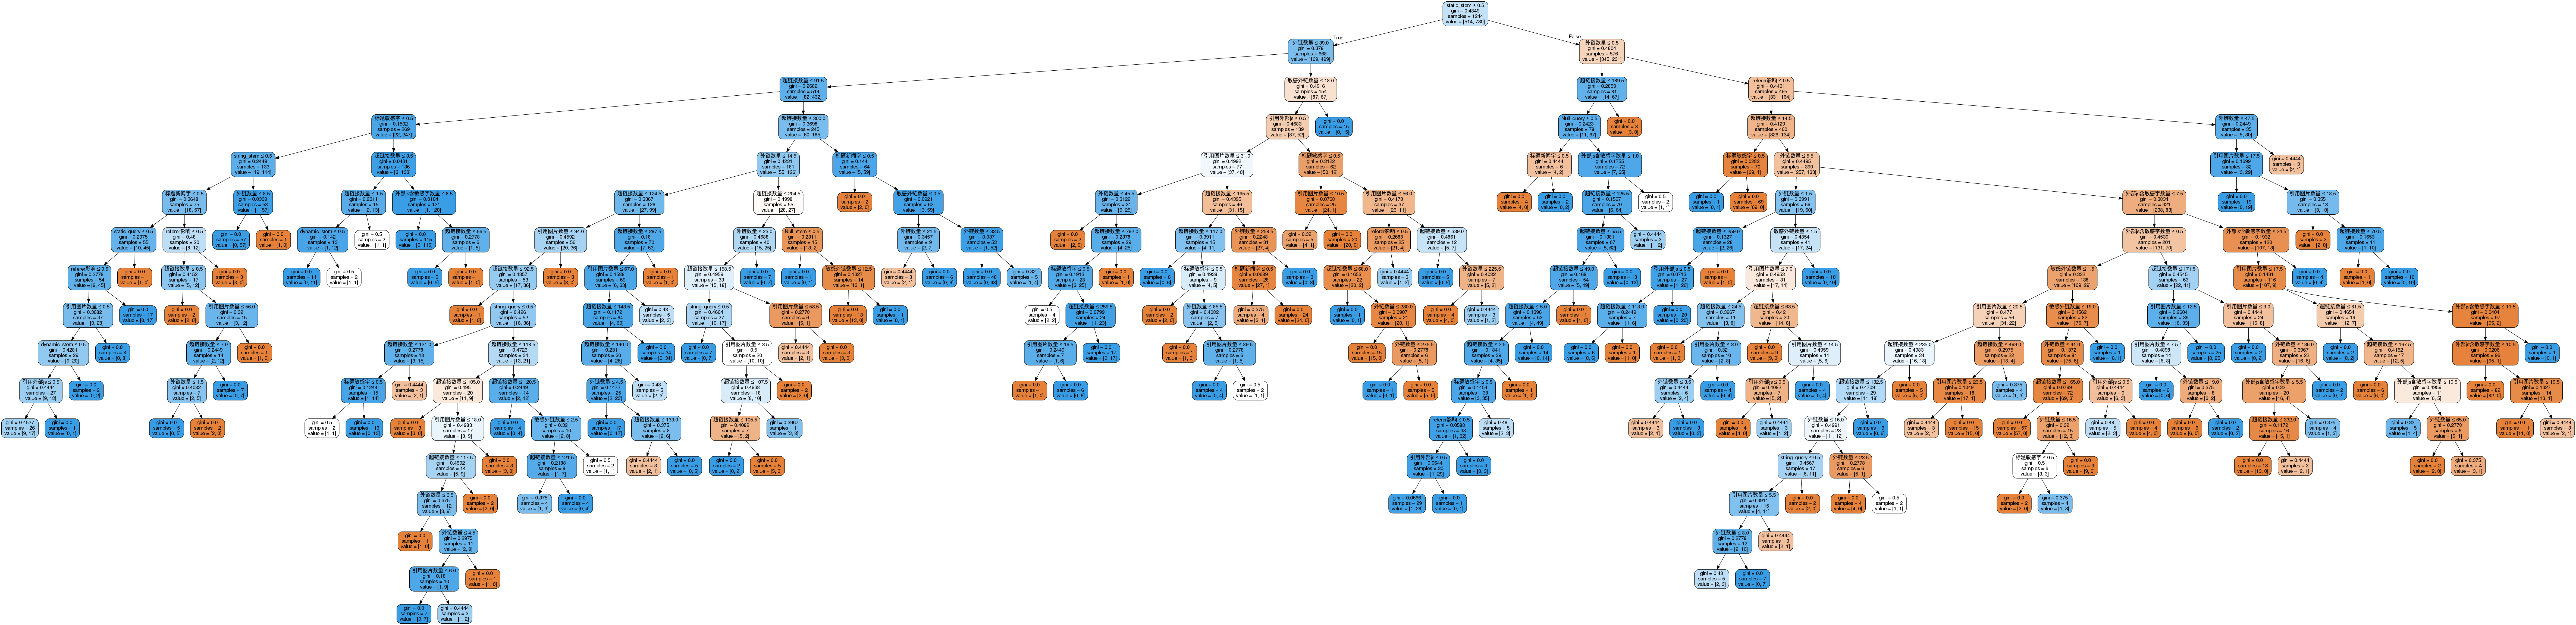

In [10]:
# 可视化
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
# 交叉验证
train_scores = cross_val_score(clf, train_data, train_target, cv=25,scoring='accuracy')
print(train_scores)
#test_scores = cross_val_score(clf, test_data, test_target, cv=5,scoring='accuracy')
#print(scores)

[ 0.82352941  0.80392157  0.80392157  0.7254902   0.78431373  0.72        0.86
  0.82        0.7         0.92        0.84        0.84        0.84        0.84
  0.81632653  0.83673469  0.79591837  0.85714286  0.91836735  0.81632653
  0.75510204  0.85714286  0.75510204  0.87755102  0.71428571]
